# Business Case: Aerofit - Descriptive Statistics & Probability

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
df = pd.read_csv("aerofit_treadmill.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# 1. Checking the structure and characteristics of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### From the above information, we can say that there is no missing value in the data.

In [ ]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### Here the columns 'Product' , 'Gender' , 'Maritalstatus' are the categorical variables and rest all are numeric.

# 2. Missing Value & Outlier Detection.
As we seen above ,there is no missing value in the data.
Lets find the outliers.

<Axes: xlabel='Income', ylabel='Gender'>

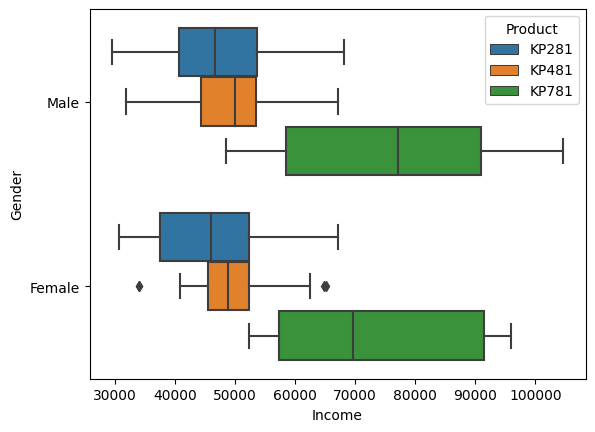

In [ ]:
sns.boxplot(data = df, x ='Income',y = "Gender",hue = 'Product')

We can see major of the female customers having income between 37k and 52k are using the product KP281.
But few female customers having the income below 35k and still using the product KP481, these are the outliers.

Similarly major female customers who have the salary between 62k and 93k tend to use the product KP781 but there are few female user outliers whose salary is around 63-65k and they still uses product KP 481.

There no male user who we can say is an outlier for buyng the product w.r.t the income.

<Axes: xlabel='Age'>

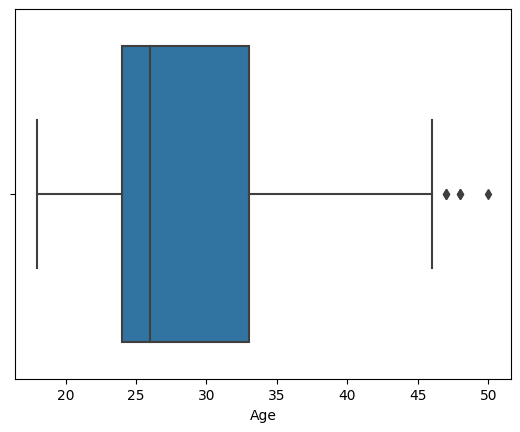

In [ ]:
sns.boxplot(data=df,x = 'Age',orient='h')

The data range clearly indicates that major of the product buyers have the age range from 18 to 33. There are less people who have age greater than 33. There are few users who are above age 45 and from the boxplot we can categorize them as outliers.

<Axes: xlabel='Income', ylabel='MaritalStatus'>

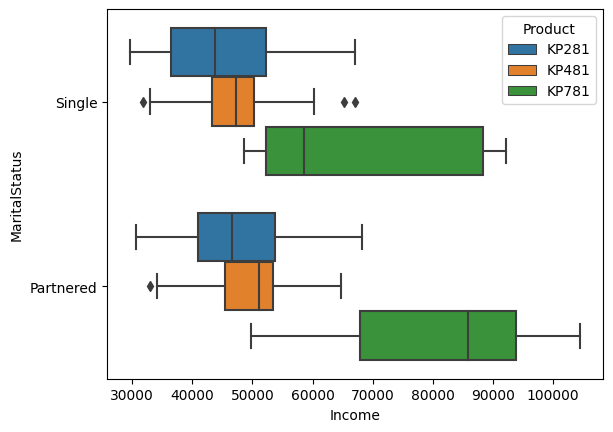

In [ ]:
sns.boxplot(data=df,x = 'Income',y='MaritalStatus',hue = 'Product',orient='h')

There are few users for product 481 in both single and Partenered categories who are the outliers.

#  3. Checking if features like marital status, age have any effect on the product purchased

<Axes: xlabel='Product', ylabel='count'>

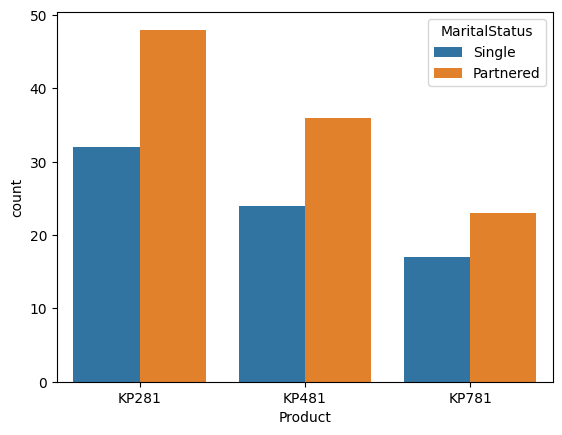

In [ ]:
sns.countplot(data=df,x='Product',hue = 'MaritalStatus')

Looks like there is no effect of being single or partnered for buying the product.

<Axes: xlabel='Age', ylabel='Product'>

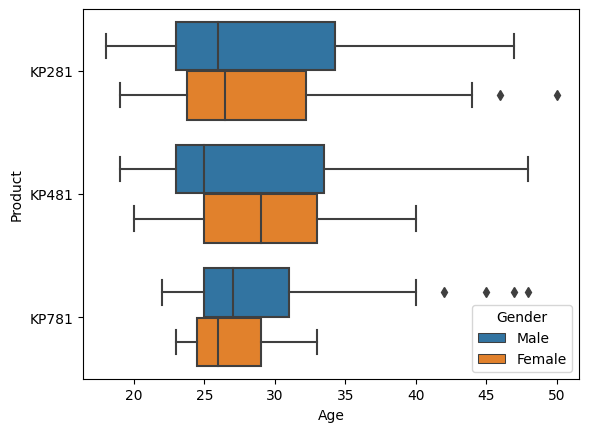

In [ ]:

sns.boxplot(data=df,
               x="Age",y='Product',hue='Gender')

<Axes: xlabel='Income', ylabel='Product'>

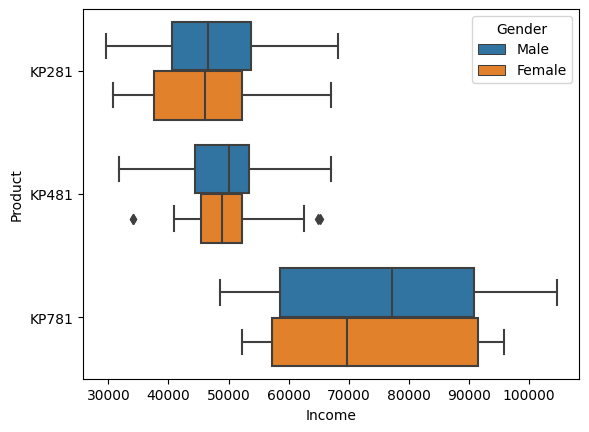

In [ ]:
sns.boxplot(data=df,
               x="Income",y='Product',hue='Gender')

##### 1. So the 50-60% people who have the income between 30k to 50k majorly tend to buy the KP281 product.
##### 2. 50-70% people who have the income from 45k to 58k majorly tend to buy the product KP481.
##### 3.  The people who have the income greter than 60k majorly buys the KP781 product.

#  4. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table

In [ ]:
#Marginal
marginal_df_prod = df.groupby('Product').size().div(len(df))
marginal_df_prod,type(marginal_df_prod)

(Product
 KP281    0.444444
 KP481    0.333333
 KP781    0.222222
 dtype: float64,
 pandas.core.series.Series)

### 44% of the total customers have bausght the product KP281, 33% have baught the product KP481 and 22 % have baught the product KP481.

In [ ]:
marginal_df_age = df.groupby('Gender').size().div(len(df))
marginal_df_age

Gender
Female    0.422222
Male      0.577778
dtype: float64

#### 57 % of the customers are male and 43 % of the customers are female.

### There is less effect of being married or being single on buying the product.

#  5. Check correlation among different factors using heat maps or pair plots

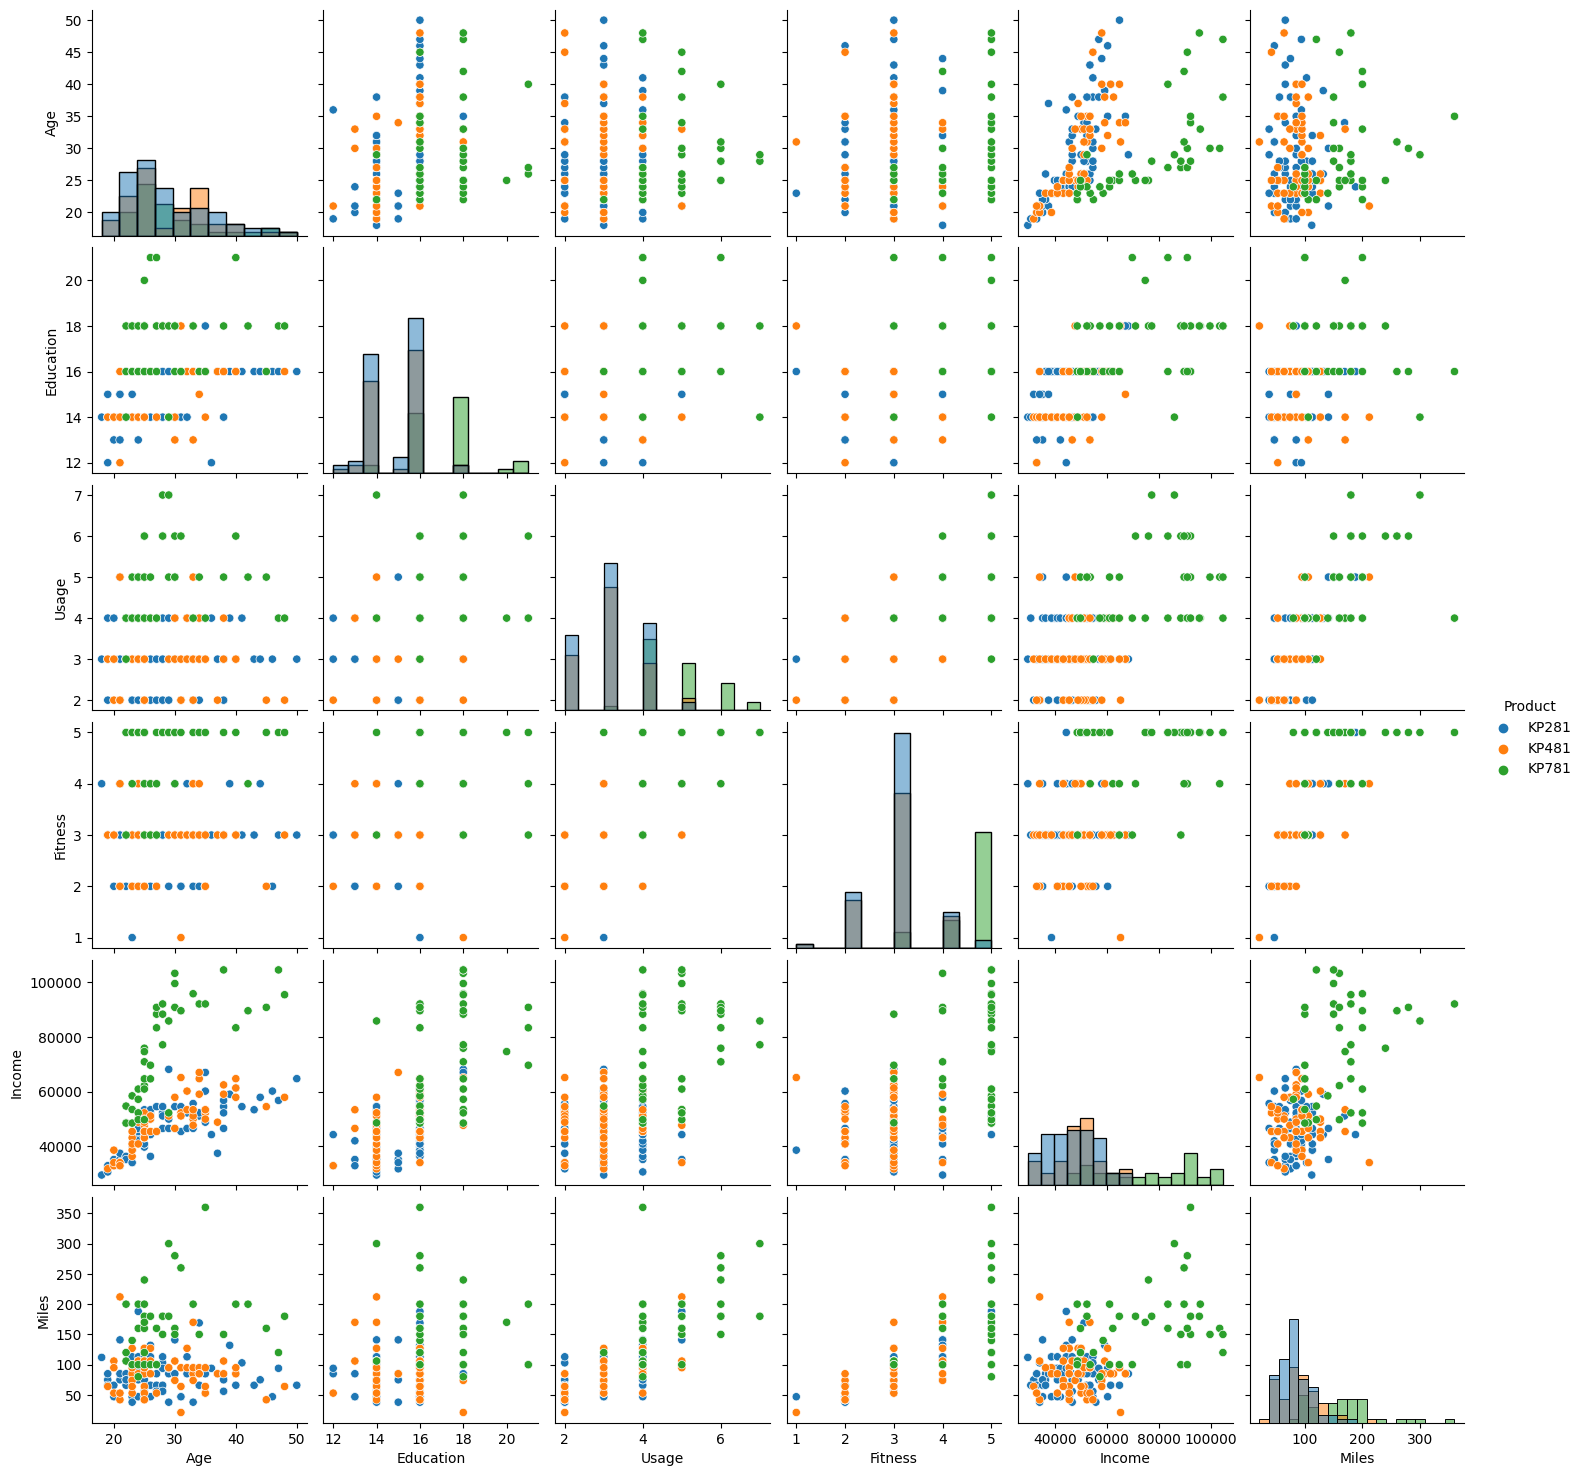

In [ ]:
sns.pairplot(data=df,hue='Product',diag_kind="hist")

### Form above fidure we can observer some relationships.
###### 1. The age have the direct effect on the income of the individual.
###### 2. The age have the direct effect on the miles expected to run per week of the individual.


# 6. Some Points to consider


<Axes: xlabel='Usage', ylabel='Miles'>

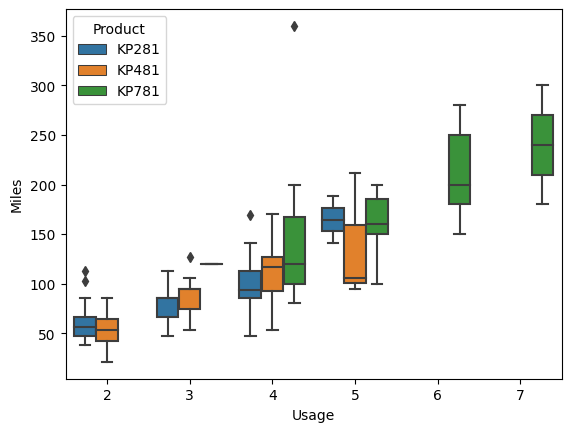

In [ ]:
sns.boxplot(data = df, x ='Usage',y = "Miles",hue = 'Product')

### Here we can see that the person who runs around 100-150 miles a week uses the product around 2-3 times a week. There are few outliers in this category who runs more than 100 miles and uses the product 2 times a week.

### Similarly, there are few customers who uses the product 4 times a week but runs around 350 miles per week. These are the outlier customers and have the product KP781.

<Axes: xlabel='Income', ylabel='Gender'>

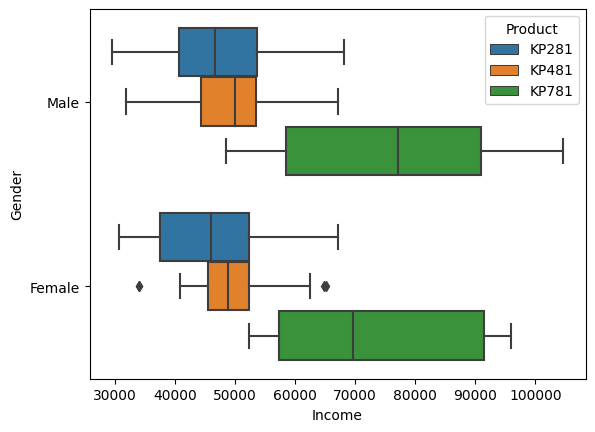

In [ ]:
sns.boxplot(data = df, x ='Income',y = "Gender",hue = 'Product')

### We can see major of the female customers having income between 37k and 52k are using the product KP281.
### But few female customers having the income below 35k and still using the product KP481, these are the outliers.

<Axes: xlabel='Income', ylabel='Count'>

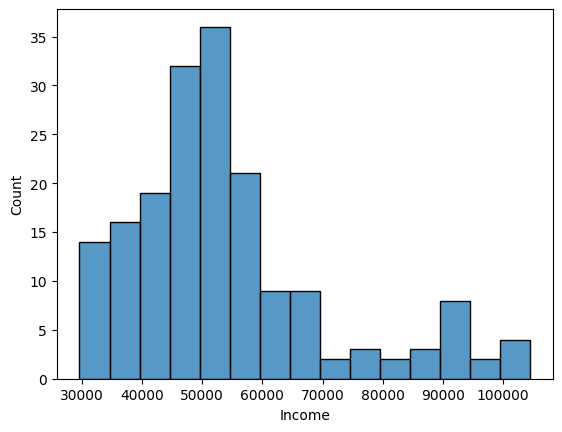

In [ ]:
sns.histplot(data=df,x = 'Income')

### This tells us that major of the customers have the income between 40k to 60 k.

<Axes: xlabel='Age', ylabel='Count'>

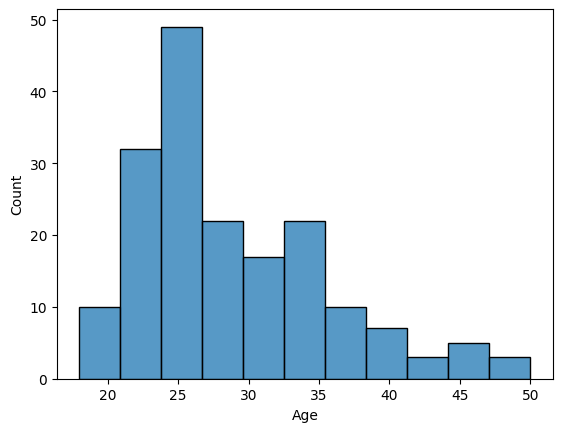

In [ ]:
sns.histplot(data=df,x = 'Age')

### This tells us the 50-60% age range for the customers is between 20 and 30

<Axes: xlabel='Income', ylabel='Gender'>

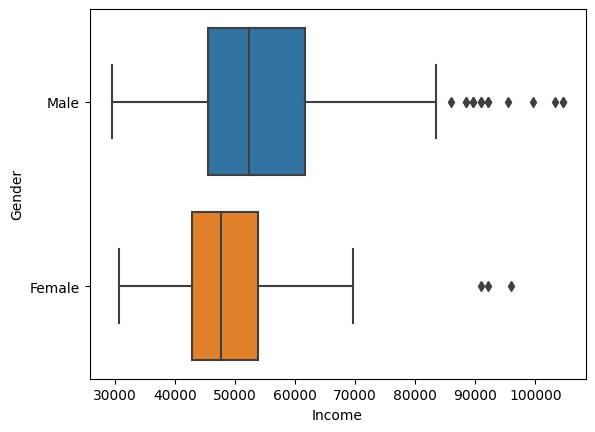

In [ ]:
sns.boxplot(data=df,x = 'Income',y='Gender')

### There are few outliers for the variable "Income" for both the genders.

<Axes: xlabel='Age', ylabel='Income'>

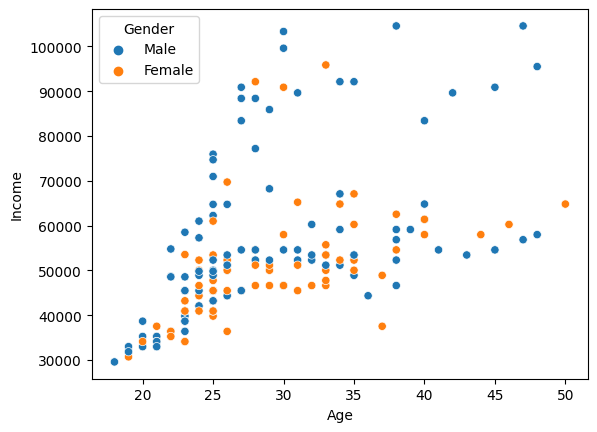

In [ ]:
sns.scatterplot(data=df,
               x="Age",
               y="Income",hue='Gender')

#### From the above graph we can see that the more than half of the people have the income less than 65k.

<Axes: xlabel='Gender', ylabel='count'>

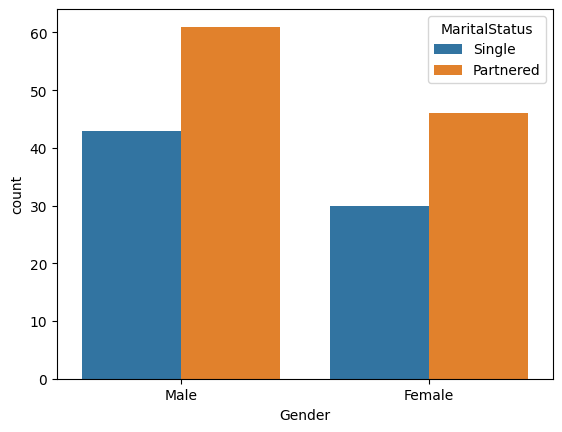

In [ ]:
sns.countplot(data=df,x='Gender',hue = 'MaritalStatus')

<Axes: xlabel='Gender', ylabel='count'>

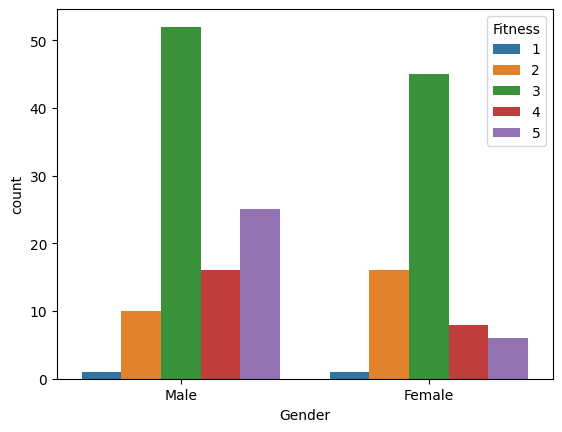

In [ ]:
sns.countplot(data=df,x='Gender',hue = 'Fitness')

### From the above graph we can say that the fitnss level of the women is same as compared to the men.

# 7. Customer Profiling - Categorization Of Users

<Axes: xlabel='Income', ylabel='Gender'>

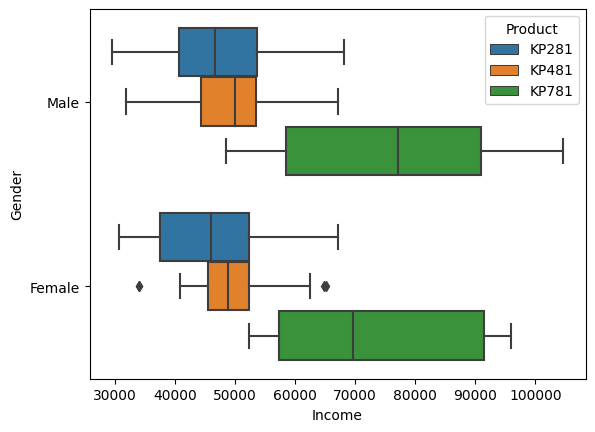

In [ ]:
sns.boxplot(data = df, x ='Income',y = "Gender",hue = 'Product')

### We can see major of the female customers having income between 37k and 52k are using the product KP281.But few female customers having the income below 35k and still using the product KP481, these are the outliers.
### The customers who have income more than 55k majorly uses the product KP781.

<Axes: xlabel='Usage', ylabel='Product'>

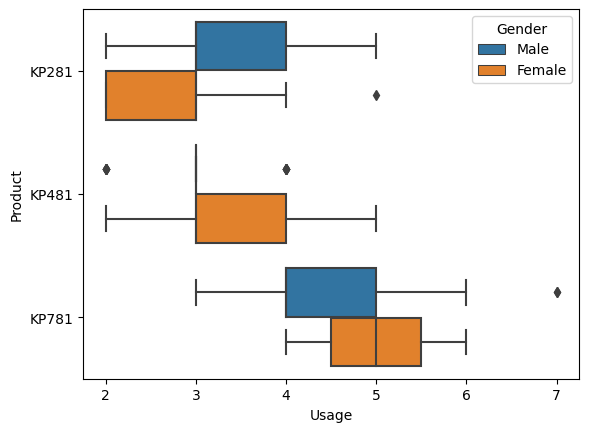

In [ ]:
sns.boxplot(data = df, x ='Usage',y = "Product",hue = 'Gender')

#### Here it is seen that the male person who uses the product KP481 exactly uses it 3 times a week .

<Axes: xlabel='Usage', ylabel='Miles'>

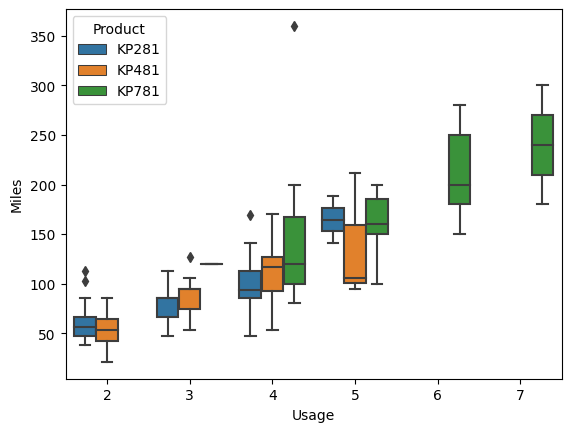

In [ ]:
sns.boxplot(data = df, x ='Usage',y = "Miles",hue = 'Product')

### Here we can see that the person who runs around 100-150 miles a week uses the products KP281 amd KP481 around 2-3 times a week. There are few outliers in this category who runs more than 100 miles and uses the product 2 times a week.

### Similarly, there are few customers who uses the 3 products 4 times a week but runs around 350 miles per week. These are the outlier customers and have the product KP781.

### The people who expects to use the product KP781 6-7 times a week tend to run aroung 150-270 miles a week.

# 8. Marginal and Conditional Probability for each product

In [ ]:
#Marginal
marginal_df_prod = df.groupby('Product').size().div(len(df))
marginal_df_prod,type(marginal_df_prod)

(Product
 KP281    0.444444
 KP481    0.333333
 KP781    0.222222
 dtype: float64,
 pandas.core.series.Series)

### 44% of the total customers have bausght the product KP281, 33% have baught the product KP481 and 22 % have baught the product KP481.

In [ ]:
marginal_df_age = df.groupby('Gender').size().div(len(df))
marginal_df_age

Gender
Female    0.422222
Male      0.577778
dtype: float64

#### 57 % of the customers are male and 43 % of the customers are female.

In [ ]:
conditional_df_married = pd.crosstab(index = df['MaritalStatus'],columns = df['Product'],margins=True,normalize='index')
conditional_df_married

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222


In [ ]:
conditional_df_gender = pd.crosstab(index = df['Gender'],columns = df['Product'],margins=True,normalize='index')
conditional_df_gender

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


##### So the female customers tend to buy KP281 and K481 product more. Only 9 % of the female customers buys the KP781 product.

##### For male customers, product buying tendeny is almost same for all three products.

#### There is no effect of being single or partenered for buying the product.

# 9. Observations

### 1. we can see that the person who runs around 100-150 miles a week uses the products KP281 amd KP481 around 2-3 times a week. There are few outliers in this category who runs more than 100 miles and uses the product 2 times a week.

### 2. Similarly, there are few customers who uses the 3 products 4 times a week but runs around 350 miles per week. These are the outlier customers and have the product KP781.

### 3. The people who expects to use the product KP781 6-7 times a week tend to run aroung 150-270 miles a week.

### 4. The female customers tend to buy KP281 and K481 product more. Only 9 % of the female customers buys the KP781 product.

### 5. We can see major of the female customers having income between 37k and 52k are using the product KP281.But few female customers having the income below 35k and still using the product KP481, these are the outliers.
### 6. The customers who have income more than 55k majorly uses the product KP781.
### 7. From the above graph we can say that the fitness level of the women is same as compared to the men.

# 10. Reccomendations -


## KP281

### 1. The new customers who have the income less than 35k ,suggest them the product KP 281.

### 2. The new customers who expects to use the treadmill 2-3 times a week ,suggest them the product KP 281.
### 3. The new customers who use to run less than 150 miles a week ,suggest them the product KP 281


## KP481

### 1. The new customers who expects to use the treadmill 3-5 times a week ,suggest them the product KP 481.
### 2. The new customers who have the income between 45k to 50k ,suggest them the product KP 481.
### 3. The new customers who expects to run 150-200 miles a week ,suggest them the product KP 481.


## KP781

### 1. Suggest the product KP781  to the new customers who have income more than 55k.
### 2. The new customers who expects to use the treadmill more than 5 times a week ,suggest them the product KP 781
### 3. The new customers who expects to run around 200-300 miles a week, suggest them the product KP781.

## Note - The female customers who tends to buy KP281 and K481 product more.So we can suggest the product KP281 or KP481 to the new female customers.




